<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Loading-Preprocessing" data-toc-modified-id="Data-Loading-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Loading Preprocessing</a></span><ul class="toc-item"><li><span><a href="#All-columns" data-toc-modified-id="All-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>All columns</a></span></li><li><span><a href="#Remove-ones-with-max-Missing" data-toc-modified-id="Remove-ones-with-max-Missing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Remove ones with max Missing</a></span></li><li><span><a href="#Fix-work-pos-column" data-toc-modified-id="Fix-work-pos-column-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Fix work pos column</a></span></li><li><span><a href="#Convert-categorical-to-numerical" data-toc-modified-id="Convert-categorical-to-numerical-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Convert categorical to numerical</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Plots" data-toc-modified-id="Plots-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#Assigning-different-column-names-for-easier-plotting" data-toc-modified-id="Assigning-different-column-names-for-easier-plotting-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Assigning different column names for easier plotting</a></span></li><li><span><a href="#Bar" data-toc-modified-id="Bar-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Bar</a></span></li></ul></li></ul></div>

# Introduction
- This project is based on the OSMI dataset 
- It was a survey conducted on mental health of people working in tech
- Link https://www.kaggle.com/osmi/mental-health-in-tech-2016#mental-heath-in-tech-2016_20161114.csv
- This project aims to understand and identify patterns from the dataset by performing EDA on it

# Imports

In [153]:
import pandas as pd
import seaborn as sns
# import sklearn as skl
import matplotlib.pyplot as plt
sns.set(style="ticks")


# Data Loading Preprocessing

In [128]:
data = pd.read_csv('data/data.csv')

In [129]:
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


## All columns 

In [130]:
oldCols = data.columns;[print(x) for x in oldCols]

Are you self-employed?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Do you think that disc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Remove ones with max Missing

In [131]:
toRemove = []

In [132]:
counter = 0 
for a in oldCols:
    counter+=1
    calc = round((data[a].isna().sum()/len(data[a]))*100,2)
    print(f'{calc}% - Colno: {counter}')
    if calc>50:
#         print(counter)
        toRemove.append(a)

0.0% - Colno: 1
20.03% - Colno: 2
20.03% - Colno: 3
81.65% - Colno: 4
20.03% - Colno: 5
29.31% - Colno: 6
20.03% - Colno: 7
20.03% - Colno: 8
20.03% - Colno: 9
20.03% - Colno: 10
20.03% - Colno: 11
20.03% - Colno: 12
20.03% - Colno: 13
20.03% - Colno: 14
20.03% - Colno: 15
20.03% - Colno: 16
79.97% - Colno: 17
79.97% - Colno: 18
79.97% - Colno: 19
89.95% - Colno: 20
79.97% - Colno: 21
79.97% - Colno: 22
79.97% - Colno: 23
85.76% - Colno: 24
0.0% - Colno: 25
11.79% - Colno: 26
11.79% - Colno: 27
11.79% - Colno: 28
11.79% - Colno: 29
11.79% - Colno: 30
11.79% - Colno: 31
11.79% - Colno: 32
11.79% - Colno: 33
11.79% - Colno: 34
11.79% - Colno: 35
11.79% - Colno: 36
0.0% - Colno: 37
23.59% - Colno: 38
0.0% - Colno: 39
21.42% - Colno: 40
0.0% - Colno: 41
0.0% - Colno: 42
0.0% - Colno: 43
6.21% - Colno: 44
54.15% - Colno: 45
0.0% - Colno: 46
0.0% - Colno: 47
0.0% - Colno: 48
60.36% - Colno: 49
77.53% - Colno: 50
0.0% - Colno: 51
50.38% - Colno: 52
0.0% - Colno: 53
0.0% - Colno: 54
0.0% - Col

In [133]:
data = data.drop(toRemove, axis=1);data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


## Fix work pos column

In [134]:
actual_cat = []
for a in data['Which of the following best describes your work position?'].str.split('|'):
    for b in a:
        if b not in actual_cat:actual_cat.append(b)

d = {actual_cat[a]:a+1 for a in range(len(actual_cat))};d

{'Back-end Developer': 1,
 'Front-end Developer': 2,
 'Supervisor/Team Lead': 3,
 'Executive Leadership': 4,
 'Dev Evangelist/Advocate': 5,
 'DevOps/SysAdmin': 6,
 'Support': 7,
 'Designer': 8,
 'One-person shop': 9,
 'Other': 10,
 'Sales': 11,
 'HR': 12}

In [135]:
def fixer(x):
    x = x.split('|')
    temp = [d[a] for a in x]
#     print(temp)
    return sum(temp)

In [136]:
fixer("Back-end Developer|Front-end Developer")

3

In [137]:
data['Which of the following best describes your work position?'] =data['Which of the following best describes your work position?'].apply(fixer) 

## Convert categorical to numerical

In [138]:
cat_columns = [x for x in data.columns if data[x].dtypes==object];cat_columns

['How many employees does your company or organization have?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
 'Do you think that discussing a physical health issue with your employer would have negative consequences?',
 'Would you feel com

In [139]:
data = data.fillna(0)

In [140]:
data[cat_columns[0]].unique()

array(['26-100', '6-25', 0, 'More than 1000', '100-500', '500-1000',
       '1-5'], dtype=object)

In [141]:
for a in cat_columns:
    data[a] = data[a].astype('category').cat.codes

In [144]:
data.head(3)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,3,1.0,3,0,2,2,1,6,2,...,1,1,39,29,49,0,49,0,1,2
1,0,5,1.0,2,3,3,3,3,4,2,...,3,4,29,62,50,12,50,13,3,1
2,0,5,1.0,2,0,2,2,1,2,1,...,1,1,38,30,49,0,49,0,1,0


# EDA 

## Plots 
- Pie
- scatter
- stacked bar
- histogram
- heatmap
- violin plot
- scatter
- swarm
- factorplot



> Note: Only a select few columns are taken as there are too many to visualize in this notebook

In [199]:
import random
columns_now = list(data.columns)
random.shuffle(columns_now)
columns_now= columns_now[:15]
columns_now

['Do you know the options for mental health care available under your employer-provided coverage?',
 'What US state or territory do you work in?',
 'Do you have previous employers?',
 'What is your age?',
 'What country do you live in?',
 'Have you been diagnosed with a mental health condition by a medical professional?',
 'How willing would you be to share with friends and family that you have a mental illness?',
 'Do you have a family history of mental illness?',
 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
 'How many employees does your company or organization have?',
 'Are you self-employed?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
 'Would you have been willing to discuss a mental health issue with your 

## Assigning different column names for easier plotting

In [238]:
d_cols= {columns_now[a]:a for a in range(len(columns_now))};d_cols

{'Do you know the options for mental health care available under your employer-provided coverage?': 0,
 'What US state or territory do you work in?': 1,
 'Do you have previous employers?': 2,
 'What is your age?': 3,
 'What country do you live in?': 4,
 'Have you been diagnosed with a mental health condition by a medical professional?': 5,
 'How willing would you be to share with friends and family that you have a mental illness?': 6,
 'Do you have a family history of mental illness?': 7,
 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 8,
 'How many employees does your company or organization have?': 9,
 'Are you self-employed?': 10,
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 11,
 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 12,
 'Would you have been willing t

In [239]:
data2 = data.copy()

In [242]:
data2 = data[columns_now]

In [244]:
data2.head()

,Do you know the options for mental health care available under your employer-provided coverage?,What US state or territory do you work in?,Do you have previous employers?,What is your age?,What country do you live in?,Have you been diagnosed with a mental health condition by a medical professional?,How willing would you be to share with friends and family that you have a mental illness?,Do you have a family history of mental illness?,"If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",How many employees does your company or organization have?,Are you self-employed?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health disorder with your coworkers?
0,0,0,1,39,49,1,4,1,1,3,0,6,1,3,1
1,3,13,1,29,50,1,4,2,4,5,0,4,2,3,1
2,0,0,1,38,49,0,4,1,1,5,0,2,2,1,1
3,0,0,1,43,49,1,0,1,4,0,1,0,2,3,0
4,3,13,1,43,50,1,4,2,4,5,0,2,3,3,1


In [250]:
data2.rename(columns =d_cols, inplace = True)

C:\Users\msubh\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [251]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,1,39,49,1,4,1,1,3,0,6,1,3,1
1,3,13,1,29,50,1,4,2,4,5,0,4,2,3,1
2,0,0,1,38,49,0,4,1,1,5,0,2,2,1,1
3,0,0,1,43,49,1,0,1,4,0,1,0,2,3,0
4,3,13,1,43,50,1,4,2,4,5,0,2,3,3,1


In [253]:
new_cols = data2.columns;new_cols

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [269]:
d_cols

{'Do you know the options for mental health care available under your employer-provided coverage?': 0,
 'What US state or territory do you work in?': 1,
 'Do you have previous employers?': 2,
 'What is your age?': 3,
 'What country do you live in?': 4,
 'Have you been diagnosed with a mental health condition by a medical professional?': 5,
 'How willing would you be to share with friends and family that you have a mental illness?': 6,
 'Do you have a family history of mental illness?': 7,
 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 8,
 'How many employees does your company or organization have?': 9,
 'Are you self-employed?': 10,
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 11,
 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 12,
 'Would you have been willing t

## Bar

In [200]:
total_cols = len(columns_now);total_cols

15

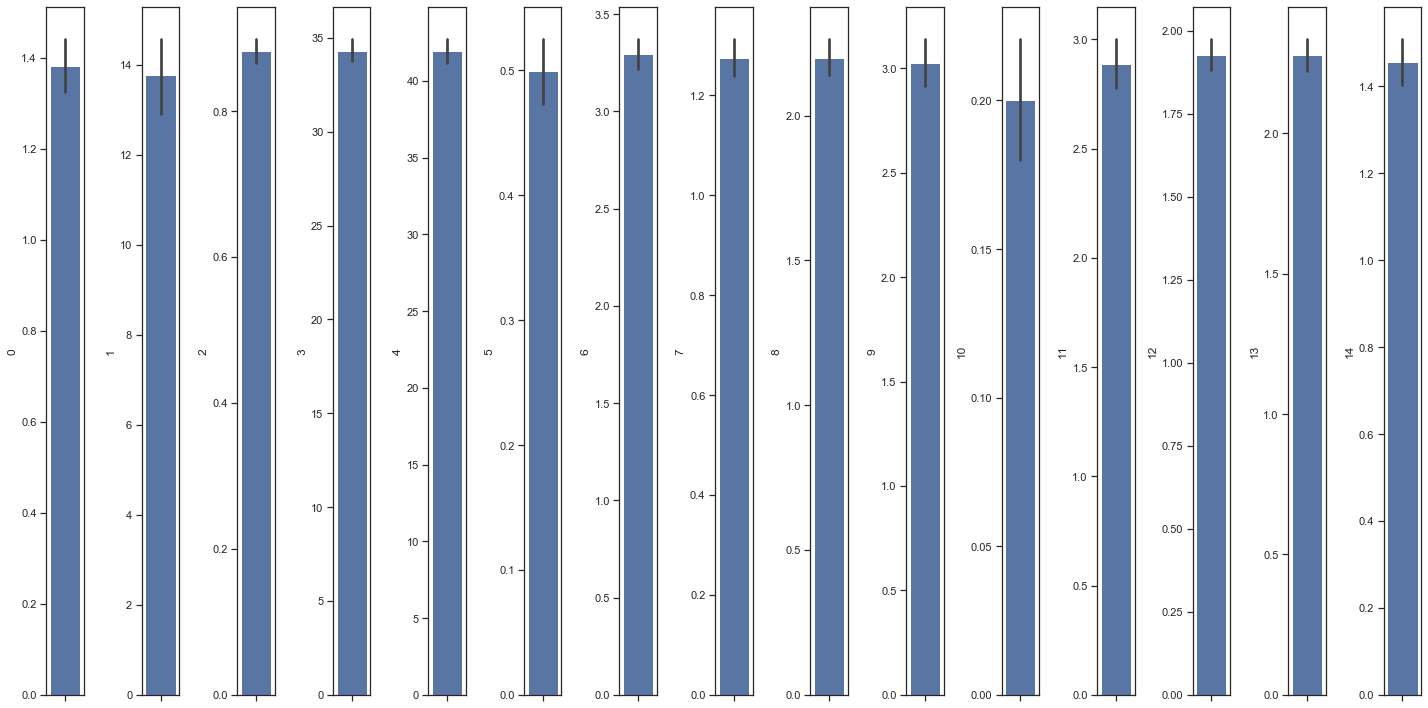

In [272]:
fig, axs = plt.subplots(ncols=15,figsize=(20,10))
for a in range(len(new_cols)):
    sns.barplot(y= data2[new_cols[a]],ax=axs[a])
plt.tight_layout()


In [281]:
fig.clf();

In [282]:
fig, axs = plt.subplots(ncols=15,figsize=(20,10))
for a in range(len(new_cols)):
    plt.pie(data2[new_cols[a]])
plt.tight_layout()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F48BC02A68> (for post_execute):


KeyboardInterrupt: 